In [1]:
import pandas as pd
import numpy as np
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re
import csv
print("Setup Complete")

Setup Complete


In [2]:
data_csv = pd.read_csv('data_with_name.csv')

In [3]:
# xem tỷ lệ giao dịch có tên và không có tên 
total_transaction = data_csv.shape[0]
total_transaction_with_name = data_csv[data_csv['Name'] != 'unknown'].shape[0]
total_transaction_without_name = data_csv[data_csv['Name'] == 'unknown'].shape[0]

print('Tổng số giao dịch: ', total_transaction)
print('Tổng số giao dịch có tên: ', total_transaction_with_name)
print('Tổng số giao dịch không có tên: ', total_transaction_without_name)
print('Tỷ lệ giao dịch có tên: ', round(total_transaction_with_name/total_transaction*100, 2) , '%')
print('Tỷ lệ giao dịch không có tên: ', round(100 - total_transaction_with_name/total_transaction*100, 2), '%')

Tổng số giao dịch:  2081426
Tổng số giao dịch có tên:  1637917
Tổng số giao dịch không có tên:  443509
Tỷ lệ giao dịch có tên:  78.69 %
Tỷ lệ giao dịch không có tên:  21.31 %


=> cho thấy phần lớn mọi người sẽ muốn thể hiện tên của mình, cty, ...

In [19]:
# dùng biểu đồ boxplot dể xem phân phối của số tiền giao dịch có tên và không có tên
data_processed_1 = data_csv[['Date', 'Name', 'Amount']]
data_processed_1['Name'] = data_processed_1['Name'].apply(lambda x: 'unknown' if x == 'unknown' else 'known')
data_processed_1['Amount'] = data_processed_1['Amount'].apply(lambda x: np.log10(x))

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_15184\4155400634.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_processed_1['Name'] = data_processed_1['Name'].apply(lambda x: 'unknown' if x == 'unknown' else 'known')
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_15184\4155400634.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_processed_1['Amount'] = data_processed_1['Amount'].apply(lambda x: np.log10(x))


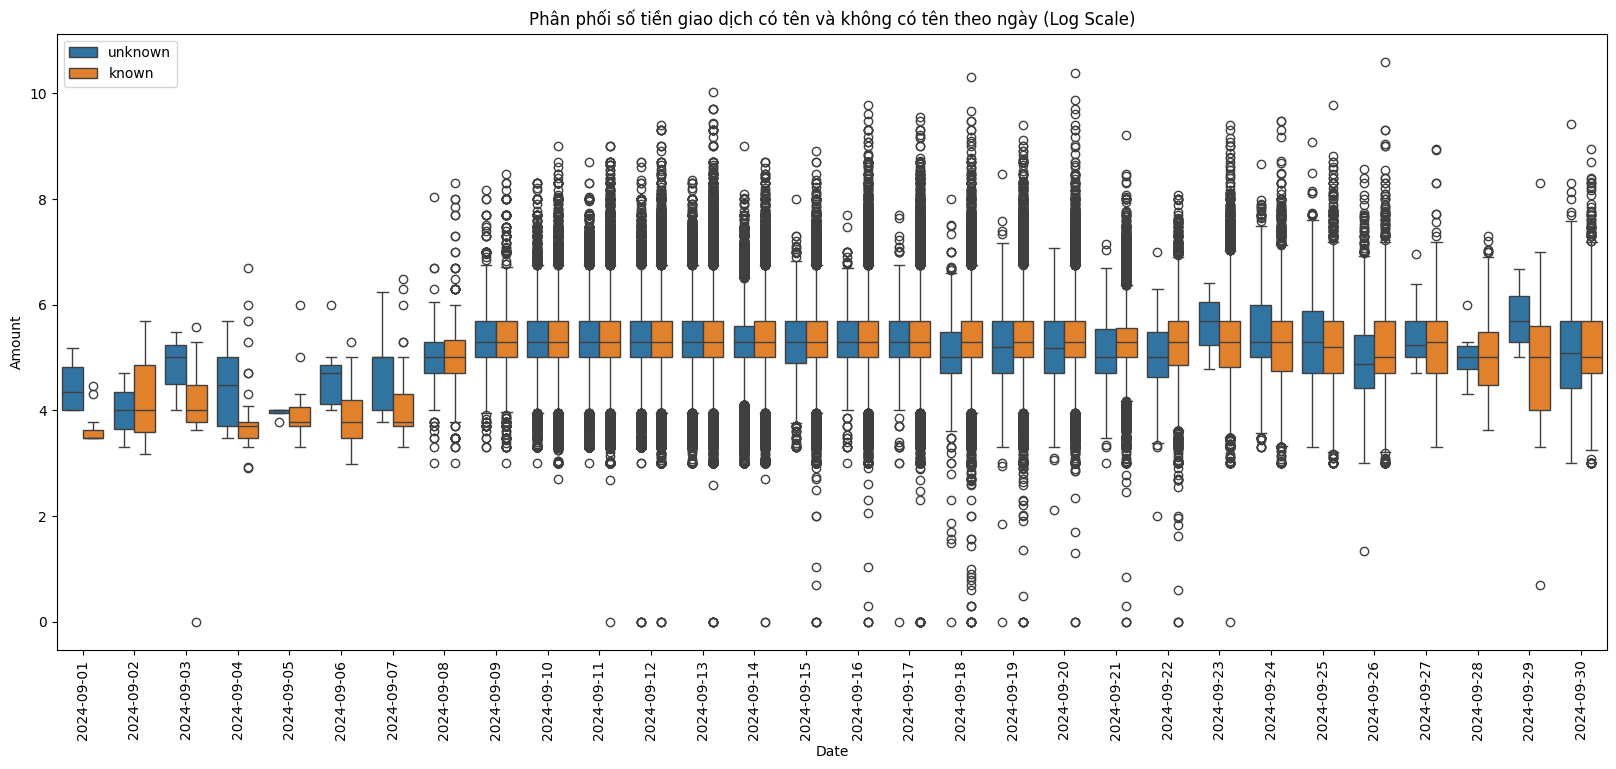

In [20]:
# Plotting the boxplot with a logarithmic scale
plt.figure(figsize=(20, 8))
sns.boxplot(x='Date', y='Amount', hue='Name', data=data_processed_1)
# plt.yscale('log')
plt.title('Phân phối số tiền giao dịch có tên và không có tên theo ngày (Log Scale)')
plt.xticks(rotation=90)
plt.legend(loc='upper left')
plt.show()


ngày 12 công khai sao kê
bão 7-9
ngày 5 bắt đầu có thông tin về bão
ngày 7 bắt đầu ủng hộ

khoảng rất lớn 10^11 nên chuyển sang log10

cả known và unknown tương đối đều nhau về số tiền gửi 
known sẽ nhỉnh hơn về lượng tiền lớn vì các tập đoàn, cty sẽ muốn để tên mình